In [134]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_absolute_error
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, PoissonRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import cross_val_score, KFold, train_test_split, GridSearchCV

In [5]:
train = pd.read_csv('train.csv', index_col=0)

In [6]:
train

,carat,cut,color,clarity,depth,table,x,y,z,theta1,theta2,price
id,,,,,,,,,,,,
17044,0.28,Ideal,F,VVS2,61.6,55.0,4.22,4.26,2.61,5,5,612
30625,0.28,Ideal,I,VS1,62.5,54.0,4.18,4.23,2.63,5,6,448
17043,0.28,'Very Good',F,IF,62.2,55.0,4.23,4.26,NaN,5,7,612
37947,0.28,'Very Good',E,VS2,63.0,59.0,4.11,4.15,2.60,5,8,487
30626,0.28,Ideal,I,VS1,62.4,54.0,4.18,4.19,2.61,5,9,448
...,...,...,...,...,...,...,...,...,...,...,...,...
25132,2.02,Premium,J,VS2,62.0,59.0,8.06,8.08,5.00,27,23,13687
25135,2.02,'Very Good',J,VS2,59.3,60.0,8.28,8.34,4.93,27,24,13693
27141,2.02,'Very Good',I,SI1,60.4,58.0,8.20,8.16,4.94,27,25,17357


In [8]:
train.isna().sum()

carat       0
cut         0
color       0
clarity    64
depth      57
table       0
x          48
y          60
z          42
theta1      0
theta2      0
price       0
dtype: int64

In [9]:
train.describe()

,carat,depth,table,x,y,z,theta1,theta2,price
count,40453.00000,40396.000000,40453.000000,40405.000000,40393.000000,40411.000000,40453.000000,40453.000000,40453.000000
mean,0.77475,61.755897,57.438563,5.704927,18.773722,3.523399,19.071738,19.036190,3736.247003
std,0.41728,1.425065,2.225439,1.033411,350.627591,0.656404,8.527417,8.570144,3615.804536
min,0.28000,43.000000,43.000000,0.000000,0.000000,0.000000,5.000000,5.000000,334.000000
25%,0.40000,61.100000,56.000000,4.740000,4.750000,2.930000,11.000000,11.000000,979.000000
50%,0.70000,61.800000,57.000000,5.700000,5.710000,3.520000,19.000000,19.000000,2401.000000
75%,1.03000,62.500000,59.000000,6.510000,6.510000,4.020000,27.000000,27.000000,5154.000000
max,2.02000,79.000000,79.000000,8.800000,9428.922353,31.800000,33.000000,33.000000,18803.000000


In [10]:
train.nunique()

carat       175
cut           5
color         7
clarity       8
depth       175
table       123
x           428
y           430
z           289
theta1       29
theta2       29
price      9909
dtype: int64

In [11]:
numeric_features = ["carat", "depth", "table", 'x', 'y', 'z', 'price']
categorial_features = ['cut', 'color', 'clarity', 'theta1', 'theta2']

array([[<Axes: title={'center': 'carat'}>,
        <Axes: title={'center': 'depth'}>,
        <Axes: title={'center': 'table'}>],
       [<Axes: title={'center': 'x'}>, <Axes: title={'center': 'y'}>,
        <Axes: title={'center': 'z'}>],
       [<Axes: title={'center': 'price'}>, <Axes: >, <Axes: >]],
      dtype=object)

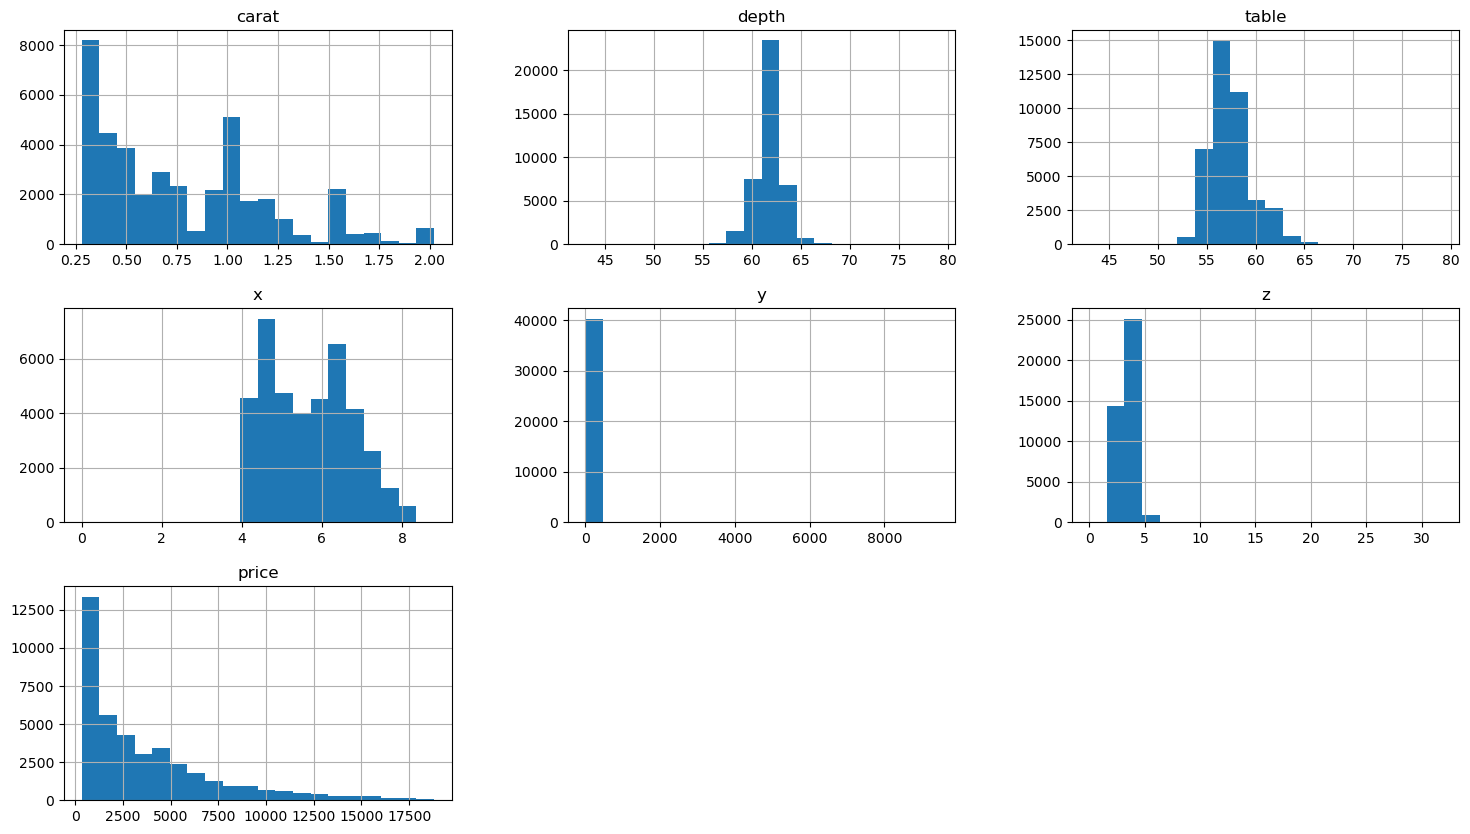

In [15]:
train[numeric_features].hist(bins=20, figsize=(18,10))

In [16]:
def df_boxplot(df, cols):
    ncols = len(cols) // 2 + (0 if len(cols) % 2 == 0 else 1)
    fig, axis = plt.subplots(2, ncols=ncols, figsize=(15,10))
    for i in range(2):
        for j in range(ncols):
            index = i*2 + j
            df.boxplot(column=cols[index], ax=axis[i][j])

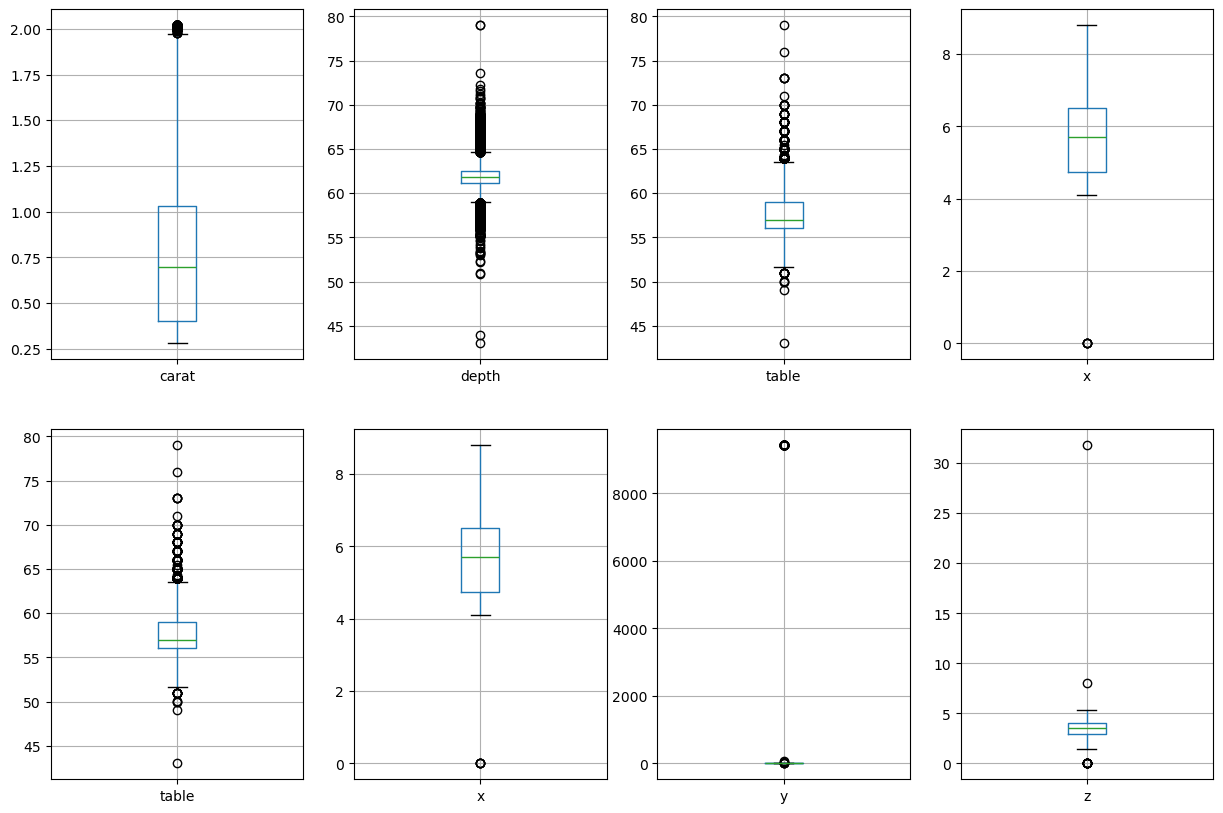

In [17]:
df_boxplot(train, numeric_features)

In [117]:
imputer = ColumnTransformer(
    transformers=[
        ("num_imputer", SimpleImputer(strategy='median'), numeric_features),
        ('cat_imputer', SimpleImputer(strategy='most_frequent'), categorial_features)
    ],
    remainder="passthrough"
)

clean_train = pd.DataFrame(imputer.fit_transform(train), columns=numeric_features + categorial_features)
clean_train

,carat,depth,table,x,y,z,price,cut,color,clarity,theta1,theta2
0,0.28,61.6,55.0,4.22,4.26,2.61,612.0,Ideal,F,VVS2,5,5
1,0.28,62.5,54.0,4.18,4.23,2.63,448.0,Ideal,I,VS1,5,6
2,0.28,62.2,55.0,4.23,4.26,3.52,612.0,'Very Good',F,IF,5,7
3,0.28,63.0,59.0,4.11,4.15,2.6,487.0,'Very Good',E,VS2,5,8
4,0.28,62.4,54.0,4.18,4.19,2.61,448.0,Ideal,I,VS1,5,9
...,...,...,...,...,...,...,...,...,...,...,...,...
40448,2.02,62.0,59.0,8.06,8.08,5.0,13687.0,Premium,J,VS2,27,23
40449,2.02,59.3,60.0,8.28,8.34,4.93,13693.0,'Very Good',J,VS2,27,24
40450,2.02,60.4,58.0,8.2,8.16,4.94,17357.0,'Very Good',I,SI1,27,25
40451,2.02,59.0,61.0,8.26,8.31,4.89,13144.0,Good,H,SI2,27,27


In [118]:
clean_train = clean_train.convert_dtypes()

In [100]:
clean_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40453 entries, 0 to 40452
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    40453 non-null  Float64
 1   depth    40453 non-null  Float64
 2   table    40453 non-null  Float64
 3   x        40453 non-null  Float64
 4   y        40453 non-null  Float64
 5   z        40453 non-null  Float64
 6   price    40453 non-null  Int64  
 7   cut      40453 non-null  string 
 8   color    40453 non-null  string 
 9   clarity  40453 non-null  string 
 10  theta1   40453 non-null  Int64  
 11  theta2   40453 non-null  Int64  
dtypes: Float64(6), Int64(3), string(3)
memory usage: 4.1 MB


In [32]:
def remove_outliers(df, cols):
    q1 = df[cols].quantile(0.25)
    q3 = df[cols].quantile(0.75)
    q = q3 - q1
    lb = q1 - 1.5*q
    up = q3 + 1.5*q
    return df[(df[cols] >= lb) & (df[cols] <= up)][cols]

In [119]:
clean_train[numeric_features] = remove_outliers(clean_train, numeric_features)

In [120]:
clean_train.dropna(inplace=True)

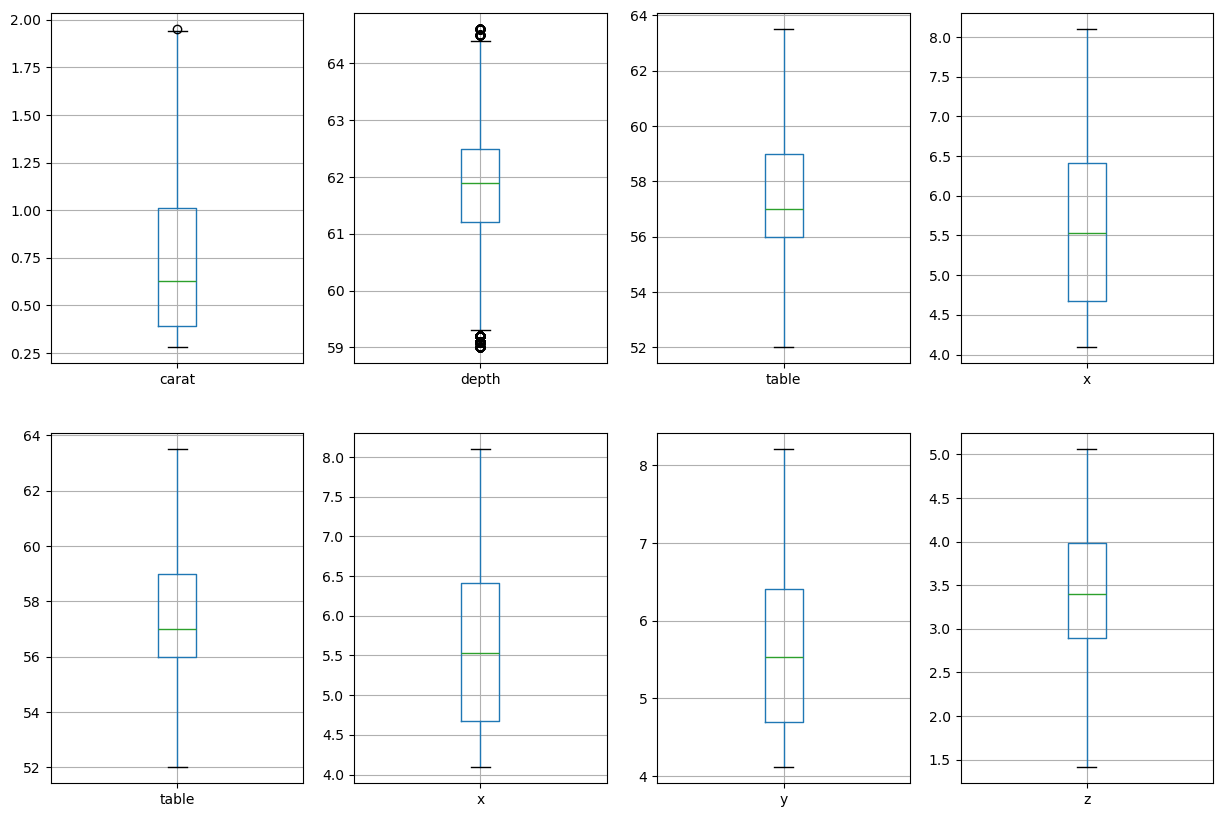

In [38]:
df_boxplot(clean_train, numeric_features)

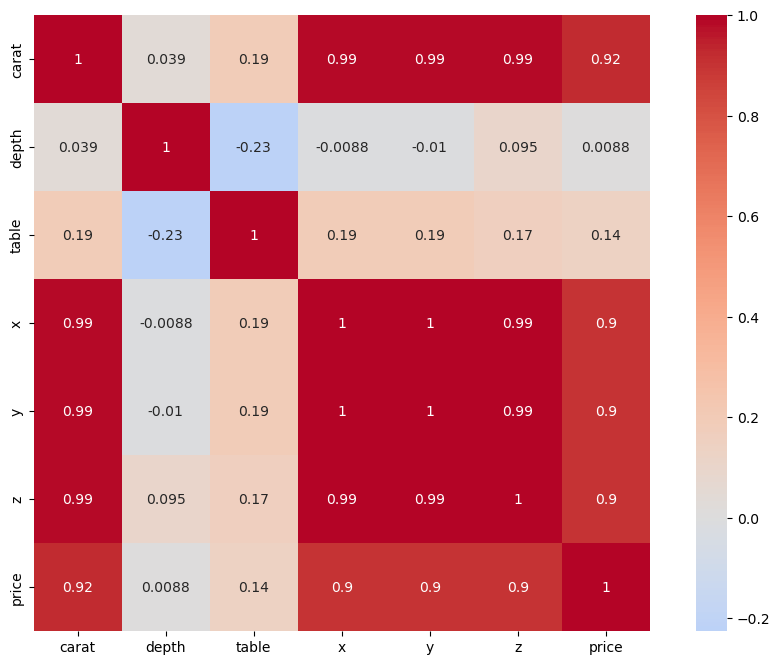

In [42]:
plt.figure(figsize=(12,8))

corr_matrix = clean_train[numeric_features].corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", center=0, square=True)
plt.show()

In [121]:
poly = PolynomialFeatures(degree=3, include_bias=False)

poly.fit(clean_train[['x', 'y', 'z', 'carat']])

,degree,3
,interaction_only,False
,include_bias,False
,order,'C'


In [122]:
clean_train[poly.get_feature_names_out()] = poly.transform(clean_train[['x', 'y', 'z', 'carat']])
clean_train

,carat,depth,table,x,y,z,price,cut,color,clarity,...,y^3,y^2 z,y^2 carat,y z^2,y z carat,y carat^2,z^3,z^2 carat,z carat^2,carat^3
0,0.28,61.6,55.0,4.22,4.26,2.61,612,Ideal,F,VVS2,...,77.308776,47.365236,5.081328,29.019546,3.113208,0.333984,17.779581,1.907388,0.204624,0.021952
1,0.28,62.5,54.0,4.18,4.23,2.63,448,Ideal,I,VS1,...,75.686967,47.058327,5.010012,29.258487,3.114972,0.331632,18.191447,1.936732,0.206192,0.021952
2,0.28,62.2,55.0,4.23,4.26,3.52,612,'Very Good',F,IF,...,77.308776,63.879552,5.081328,52.783104,4.198656,0.333984,43.614208,3.469312,0.275968,0.021952
3,0.28,63.0,59.0,4.11,4.15,2.60,487,'Very Good',E,VS2,...,71.473375,44.778500,4.822300,28.054000,3.021200,0.325360,17.576000,1.892800,0.203840,0.021952
4,0.28,62.4,54.0,4.18,4.19,2.61,448,Ideal,I,VS1,...,73.560059,45.821421,4.915708,28.542699,3.062052,0.328496,17.779581,1.907388,0.204624,0.021952
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39783,1.91,64.6,56.0,7.76,7.70,4.99,6632,Fair,H,SI2,...,456.533000,295.857100,113.243900,191.730770,73.387930,28.090370,124.251499,47.559191,18.204019,6.967871
39787,1.91,62.8,58.0,7.82,7.89,4.93,10937,Good,I,SI2,...,491.169069,306.902853,118.901511,191.765661,74.294607,28.783509,119.823157,46.422359,17.985133,6.967871
39790,1.91,61.9,58.0,7.90,7.84,4.87,9038,Premium,G,SI2,...,481.890304,299.337472,117.399296,185.940496,72.925328,28.601104,115.501303,45.299279,17.766247,6.967871
39800,1.94,63.1,59.0,8.01,7.89,5.02,9344,'Very Good',I,SI2,...,491.169069,312.505542,120.769074,198.831156,76.839132,29.694804,126.506008,48.888776,18.893272,7.301384


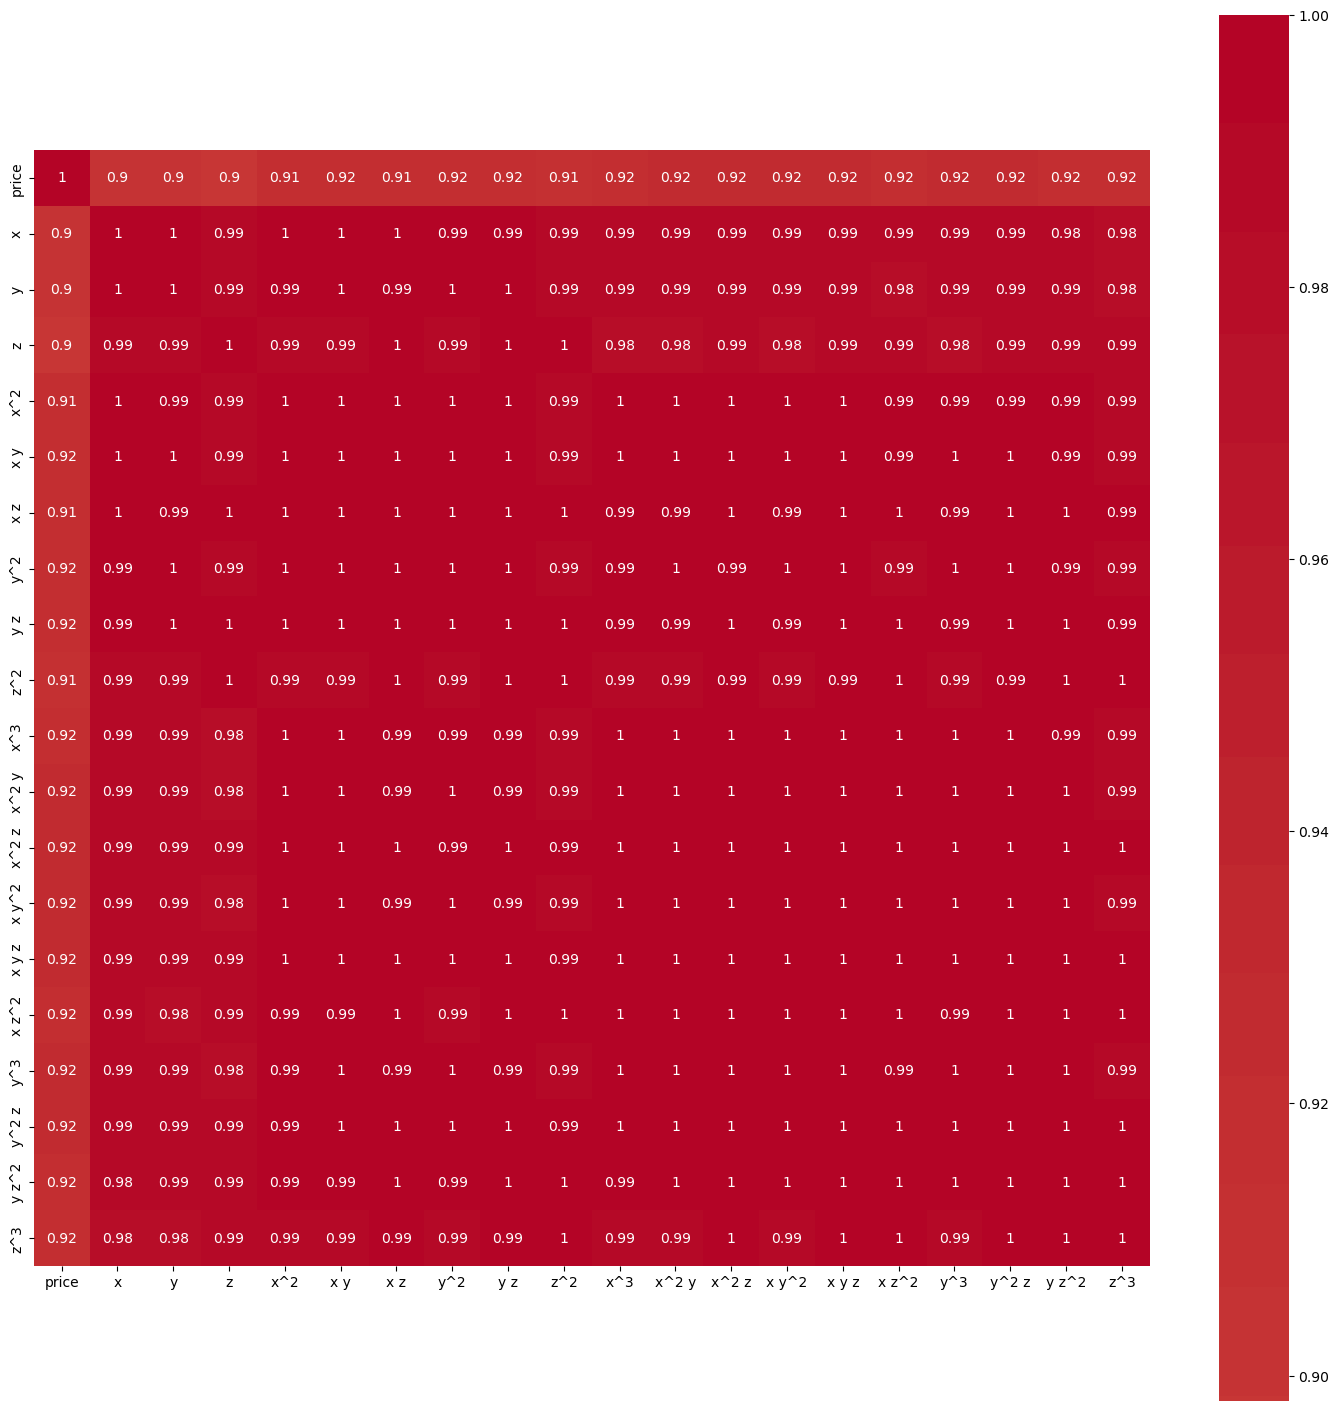

In [105]:
plt.figure(figsize=(18,18))

corr_matrix = clean_train[[numeric_features[-1]] + poly.get_feature_names_out().tolist()].corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", center=0, square=True)
plt.show()

In [123]:
scaler = StandardScaler()
clean_train[numeric_features[:-1] + poly.get_feature_names_out().tolist()] = scaler.fit_transform(clean_train[numeric_features[:-1] + poly.get_feature_names_out().tolist()])

In [107]:
clean_train

,carat,depth,table,x,y,z,price,cut,color,clarity,...,x^3,x^2 y,x^2 z,x y^2,x y z,x z^2,y^3,y^2 z,y z^2,z^3
0,-1.199246,-0.188474,-1.114650,-1.420663,-1.391362,-1.416330,612,Ideal,F,VVS2,...,-1.191305,-1.187634,-1.192949,-1.183333,-1.189021,-1.192343,-1.178443,-1.184472,-1.188154,-1.189638
1,-1.199246,0.647525,-1.611337,-1.462800,-1.423143,-1.382305,448,Ideal,I,VS1,...,-1.213663,-1.208344,-1.201983,-1.202332,-1.196203,-1.187758,-1.195674,-1.189749,-1.181524,-1.171242
2,-1.199246,0.368859,-1.114650,-1.410128,-1.391362,0.131830,612,'Very Good',F,IF,...,-1.185649,-1.183822,-0.910342,-1.181407,-0.905647,-0.537064,-1.178443,-0.900544,-0.528803,-0.035739
3,-1.199246,1.111969,0.872098,-1.536541,-1.507890,-1.433343,487,'Very Good',E,VS2,...,-1.251772,-1.248650,-1.236796,-1.244858,-1.233196,-1.219022,-1.240440,-1.228945,-1.214945,-1.198731
4,-1.199246,0.554636,-1.611337,-1.462800,-1.465516,-1.416330,448,Ideal,I,VS1,...,-1.213663,-1.215745,-1.207967,-1.217270,-1.209763,-1.199888,-1.218271,-1.211015,-1.201385,-1.189638
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39783,3.314481,2.598189,-0.617963,2.308513,2.252765,2.632704,6632,Fair,H,SI2,...,2.950414,2.919312,3.156773,2.885963,3.123455,3.362139,2.850537,3.087814,3.326484,3.565911
39787,3.314481,0.926191,0.375411,2.371720,2.454040,2.530627,10937,Good,I,SI2,...,3.065784,3.118584,3.173821,3.169493,3.226743,3.274624,3.218520,3.277722,3.327452,3.368120
39790,3.314481,0.090192,0.375411,2.455995,2.401073,2.428551,9038,Premium,G,SI2,...,3.222387,3.190618,3.215868,3.156408,3.182945,3.199837,3.119940,3.147651,3.165825,3.175085
39800,3.397555,1.204858,0.872098,2.571873,2.454040,2.683742,9344,'Very Good',I,SI2,...,3.442956,3.369894,3.526626,3.294995,3.451230,3.601120,3.218520,3.374048,3.523493,3.666608


array([[<Axes: title={'center': 'carat'}>,
        <Axes: title={'center': 'depth'}>,
        <Axes: title={'center': 'table'}>, <Axes: title={'center': 'x'}>,
        <Axes: title={'center': 'y'}>],
       [<Axes: title={'center': 'z'}>, <Axes: title={'center': 'x'}>,
        <Axes: title={'center': 'y'}>, <Axes: title={'center': 'z'}>,
        <Axes: title={'center': 'x^2'}>],
       [<Axes: title={'center': 'x y'}>, <Axes: title={'center': 'x z'}>,
        <Axes: title={'center': 'y^2'}>, <Axes: title={'center': 'y z'}>,
        <Axes: title={'center': 'z^2'}>],
       [<Axes: title={'center': 'x^3'}>,
        <Axes: title={'center': 'x^2 y'}>,
        <Axes: title={'center': 'x^2 z'}>,
        <Axes: title={'center': 'x y^2'}>,
        <Axes: title={'center': 'x y z'}>],
       [<Axes: title={'center': 'x z^2'}>,
        <Axes: title={'center': 'y^3'}>,
        <Axes: title={'center': 'y^2 z'}>,
        <Axes: title={'center': 'y z^2'}>,
        <Axes: title={'center': 'z^3'}>]], d

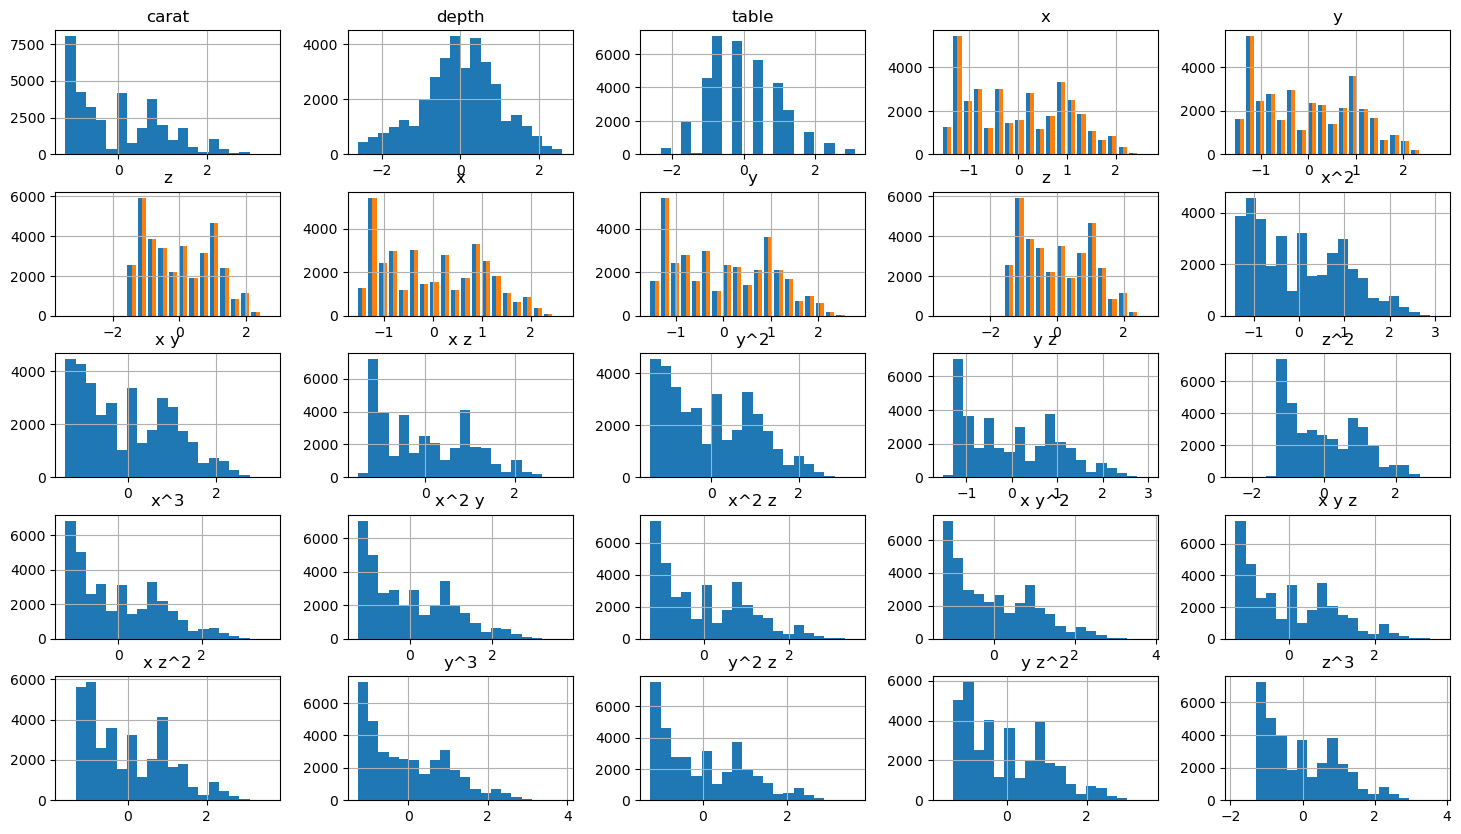

In [108]:
clean_train[numeric_features[:-1] + poly.get_feature_names_out().tolist()].hist(bins=20, figsize=(18,10))

In [57]:
def get_ohe(df):
    cut_map = {
        'Fair': 1,
        "Good": 2,
        "Premium": 3,
        "'Very Good'": 4,
        "Ideal": 5
    }

    clarity_map = {
        "I1": 1,
        "SI2": 2,
        "SI1": 3,
        "VS2": 4,
        "VS1": 5,
        "VVS2": 6,
        "VVS1": 7,
        "IF": 8 
    }

    color_map = {
        "F": 1,
        "I": 2,
        "E": 3,
        "H": 4,
        "D": 5,
        "G": 6,
        "J": 7
    }

    df['cut'] = df['cut'].map(cut_map)
    df['clarity'] = df['clarity'].map(clarity_map)
    df['color'] = df['color'].map(color_map)

In [124]:
get_ohe(clean_train)
clean_train

,carat,depth,table,x,y,z,price,cut,color,clarity,...,y^3,y^2 z,y^2 carat,y z^2,y z carat,y carat^2,z^3,z^2 carat,z carat^2,carat^3
0,-1.199246,-0.188474,-1.114650,-1.420663,-1.391362,-1.416330,612,5,1,6,...,-1.178443,-1.184472,-0.995374,-1.188154,-0.996489,-0.832260,-1.189638,-0.996533,-0.832105,-0.699619
1,-1.199246,0.647525,-1.611337,-1.462800,-1.423143,-1.382305,448,5,2,5,...,-1.195674,-1.189749,-0.998666,-1.181524,-0.996358,-0.832779,-1.171242,-0.993000,-0.831545,-0.699619
2,-1.199246,0.368859,-1.114650,-1.410128,-1.391362,0.131830,612,4,1,8,...,-1.178443,-0.900544,-0.995374,-0.528803,-0.915502,-0.832260,-0.035739,-0.808448,-0.806644,-0.699619
3,-1.199246,1.111969,0.872098,-1.536541,-1.507890,-1.433343,487,4,3,4,...,-1.240440,-1.228945,-1.007329,-1.214945,-1.003354,-0.834164,-1.198731,-0.998290,-0.832385,-0.699619
4,-1.199246,0.554636,-1.611337,-1.462800,-1.465516,-1.416330,448,5,2,5,...,-1.218271,-1.211015,-1.003018,-1.201385,-1.000306,-0.833472,-1.189638,-0.996533,-0.832105,-0.699619
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39783,3.314481,2.598189,-0.617963,2.308513,2.252765,2.632704,6632,1,4,2,...,2.850537,3.087814,3.996537,3.326484,4.246837,5.298496,3.565911,4.500805,5.591507,6.769135
39787,3.314481,0.926191,0.375411,2.371720,2.454040,2.530627,10937,2,2,2,...,3.218520,3.277722,4.257647,3.327452,4.314486,5.451595,3.368120,4.363909,5.513391,6.769135
39790,3.314481,0.090192,0.375411,2.455995,2.401073,2.428551,9038,3,6,2,...,3.119940,3.147651,4.188317,3.165825,4.212322,5.411306,3.175085,4.228669,5.435275,6.769135
39800,3.397555,1.204858,0.872098,2.571873,2.454040,2.683742,9344,4,2,2,...,3.218520,3.374048,4.343838,3.523493,4.504338,5.652879,3.666608,4.660912,5.837487,7.127753


In [125]:
clean_train = clean_train.drop(labels=['theta1', 'theta2'], axis=1)

In [126]:
clean_train

,carat,depth,table,x,y,z,price,cut,color,clarity,...,y^3,y^2 z,y^2 carat,y z^2,y z carat,y carat^2,z^3,z^2 carat,z carat^2,carat^3
0,-1.199246,-0.188474,-1.114650,-1.420663,-1.391362,-1.416330,612,5,1,6,...,-1.178443,-1.184472,-0.995374,-1.188154,-0.996489,-0.832260,-1.189638,-0.996533,-0.832105,-0.699619
1,-1.199246,0.647525,-1.611337,-1.462800,-1.423143,-1.382305,448,5,2,5,...,-1.195674,-1.189749,-0.998666,-1.181524,-0.996358,-0.832779,-1.171242,-0.993000,-0.831545,-0.699619
2,-1.199246,0.368859,-1.114650,-1.410128,-1.391362,0.131830,612,4,1,8,...,-1.178443,-0.900544,-0.995374,-0.528803,-0.915502,-0.832260,-0.035739,-0.808448,-0.806644,-0.699619
3,-1.199246,1.111969,0.872098,-1.536541,-1.507890,-1.433343,487,4,3,4,...,-1.240440,-1.228945,-1.007329,-1.214945,-1.003354,-0.834164,-1.198731,-0.998290,-0.832385,-0.699619
4,-1.199246,0.554636,-1.611337,-1.462800,-1.465516,-1.416330,448,5,2,5,...,-1.218271,-1.211015,-1.003018,-1.201385,-1.000306,-0.833472,-1.189638,-0.996533,-0.832105,-0.699619
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39783,3.314481,2.598189,-0.617963,2.308513,2.252765,2.632704,6632,1,4,2,...,2.850537,3.087814,3.996537,3.326484,4.246837,5.298496,3.565911,4.500805,5.591507,6.769135
39787,3.314481,0.926191,0.375411,2.371720,2.454040,2.530627,10937,2,2,2,...,3.218520,3.277722,4.257647,3.327452,4.314486,5.451595,3.368120,4.363909,5.513391,6.769135
39790,3.314481,0.090192,0.375411,2.455995,2.401073,2.428551,9038,3,6,2,...,3.119940,3.147651,4.188317,3.165825,4.212322,5.411306,3.175085,4.228669,5.435275,6.769135
39800,3.397555,1.204858,0.872098,2.571873,2.454040,2.683742,9344,4,2,2,...,3.218520,3.374048,4.343838,3.523493,4.504338,5.652879,3.666608,4.660912,5.837487,7.127753


In [89]:
tmp = clean_train.drop(labels=clean_train.columns[np.where(model2.coef_ == 0)], axis=1)

In [127]:
x_train, x_test, y_train, y_test = train_test_split(clean_train.drop('price', axis=1).to_numpy(), clean_train['price'].to_numpy(), test_size=0.2)

In [112]:
kfold = KFold(n_splits=20, shuffle=True, random_state=1234)

In [76]:
def eval_models(models, x, y, cv):
    result = {}
    for name, model in models.items():
        print(f"\n--- Оценка {name} ---")
        mae_score = -cross_val_score(model, x, y, cv=cv, scoring="neg_mean_absolute_error")
        result[name] = {
            "MAE": mae_score.mean(),
            "MAE_std": mae_score.std(),
            "model": model
        }

        print(f"MAE: {mae_score.mean():.2f} +- {mae_score.std():.2f}")
    return pd.DataFrame(result)

In [128]:
models = {
    'Lin Reg': LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso()
}

eval_models(models, x_train, y_train, kfold)


--- Оценка Lin Reg ---
MAE: 573.63 +- 14.34

--- Оценка Ridge ---
MAE: 577.34 +- 14.67

--- Оценка Lasso ---


c:\Users\skygo\miniconda3\envs\ml_classic\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.058e+09, tolerance: 1.933e+07
  model = cd_fast.enet_coordinate_descent(
c:\Users\skygo\miniconda3\envs\ml_classic\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.084e+09, tolerance: 1.933e+07
  model = cd_fast.enet_coordinate_descent(
c:\Users\skygo\miniconda3\envs\ml_classic\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasi

MAE: 582.49 +- 14.10


c:\Users\skygo\miniconda3\envs\ml_classic\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.078e+09, tolerance: 1.931e+07
  model = cd_fast.enet_coordinate_descent(


,Lin Reg,Ridge,Lasso
MAE,573.630134,577.340187,582.489546
MAE_std,14.344193,14.674011,14.101726
model,LinearRegression(),Ridge(),Lasso()


In [92]:
x_train.shape

(28688, 39)

In [132]:
params = {
    'ridge': {'alpha': [0.001, 0.01, 0.1, 0.5, 1, 2, 5, 10, 20, 50]},
    'lasso': {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.5, 1]}
}

ridge = Ridge(random_state=1234)
ridge_grid_search = GridSearchCV(ridge, params['ridge'], cv=kfold, scoring="neg_mean_absolute_error", n_jobs=-1)
ridge_grid_search.fit(x_train, y_train)

print(f"Лучший параметр для Ridge: {ridge_grid_search.best_params_}")
print(f"Лучший MAE: {-ridge_grid_search.best_score_:.2f}")

lasso = Lasso(random_state=1234, max_iter=1000)
lasso_grid_search = GridSearchCV(lasso, params['lasso'], cv=kfold, scoring="neg_mean_absolute_error", n_jobs=-1)
lasso_grid_search.fit(x_train, y_train)

print(f"Лучший параметр для Lasso: {lasso_grid_search.best_params_}")
print(f"Лучший MAE: {-lasso_grid_search.best_score_:.2f}")


Лучший параметр для Ridge: {'alpha': 0.001}
Лучший MAE: 574.65


KeyboardInterrupt: 

In [ ]:
models_tuned = {
    "Ridge" : Ridge(alpha=ridge_grid_search.best_params_['alpha']),
    "Lasso": Lasso(alpha=lasso_grid_search.best_params_['alpha'], max_iter=25000)
}

eval_models(models_tuned, x_train, y_train, kfold)

In [136]:
models = {
    "Poisson Reg": PoissonRegressor(alpha=0.001, max_iter=10000, solver='newton-cholesky')
}

eval_models(models, x_train, y_train, kfold)


--- Оценка Poisson Reg ---
MAE: 428.89 +- 13.71


,Poisson Reg
MAE,428.890643
MAE_std,13.709059
model,"PoissonRegressor(alpha=0.001, max_iter=10000, ..."


In [137]:
models = {
    "Rand forest": RandomForestRegressor(),
    "Grad Boost": GradientBoostingRegressor()
    }


eval_models(models, x_train, y_train, kfold)



--- Оценка Rand forest ---
MAE: 220.99 +- 7.75

--- Оценка Grad Boost ---
MAE: 272.42 +- 8.00


,Rand forest,Grad Boost
MAE,220.986544,272.420021
MAE_std,7.753802,7.996902
model,RandomForestRegressor(),GradientBoostingRegressor()


In [141]:
models["Rand forest"].ccp_alpha

0.0